In [5]:
import psycopg2
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



conn = psycopg2.connect(database="nashville", user = "postgres", password = "Dg033018", host = "127.0.0.1", port = "5432")

print ("Opened database successfully")
cur_sv = conn.cursor()
cur_sv.execute('select * from public.property_standards_violations LIMIT 1;')
rows = cur_sv.fetchall()

for row in rows:
    print('request_no = ',row[0])
    print('date_recv = ',row[1])
    print('prop_apn = ',row[2])
    print('prop_address = ',row[3])


 
cur_lv = conn.cursor()
cur_lv.execute('select * from public.codes_list_of_violations LIMIT 3;')        
rows2 = cur_lv.fetchall()

#for row in rows2:
#    print('violation_desc = ',row[3])
#    print('violation_text = ',row[4])
#conn.close()
type(rows2)
#print ('Operation done successfully')


Opened database successfully
request_no =  17-1156755
date_recv =  2017-05-04
prop_apn =  05814005400
prop_address =  121  QUEENS LN


list

In [6]:
# This is the group classification results from using Justin's code
# In order to use barplot we need to convert list to dataframe

cur_vi = conn.cursor()
cur_vi.execute('select * from category_fequency_view \
                where 1=1;')  
rows_vi = cur_vi.fetchall()

    
#conn.close()
cats = {'Cats': ['Property', 'Water', 'Occupancy', 'Dumping', 'Electrical', 'Illiegal_Bus_Op', 'Overgroth', 'Vehicle', 'Trash', 'Animal', 'Inspector_Notes'], 
        'Total': [rows_vi[0][0],
                  rows_vi[0][1],
                  rows_vi[0][2],
                  rows_vi[0][3],
                  rows_vi[0][4],
                  rows_vi[0][5],
                  rows_vi[0][6],
                  rows_vi[0][7],
                  rows_vi[0][8],
                  rows_vi[0][9],
                  rows_vi[0][10]]}

categories = pd.DataFrame(data=cats)

In [7]:
categories
#type(categories)
#cats

,Cats,Total
0,Property,51696
1,Water,35411
2,Occupancy,1141
3,Dumping,2715
4,Electrical,2514
5,Illiegal_Bus_Op,470
6,Overgroth,5613
7,Vehicle,20984
8,Trash,16848
9,Animal,15876


In [8]:
import seaborn as sns

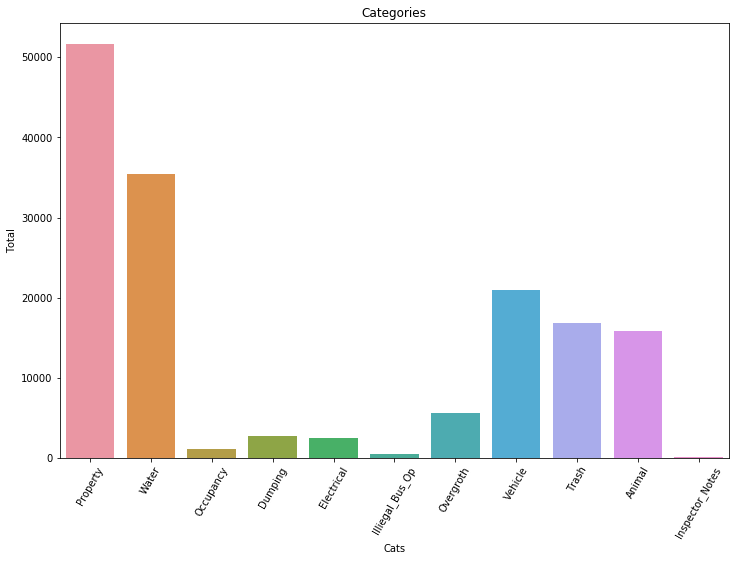

In [9]:
#sns.set_style('whitegrid')

g = sns.barplot(x='Cats', y='Total', data=categories)
g.figure.set_size_inches(12,8)
g.set_title('Categories')
for item in g.get_xticklabels():
    item.set_rotation(60)


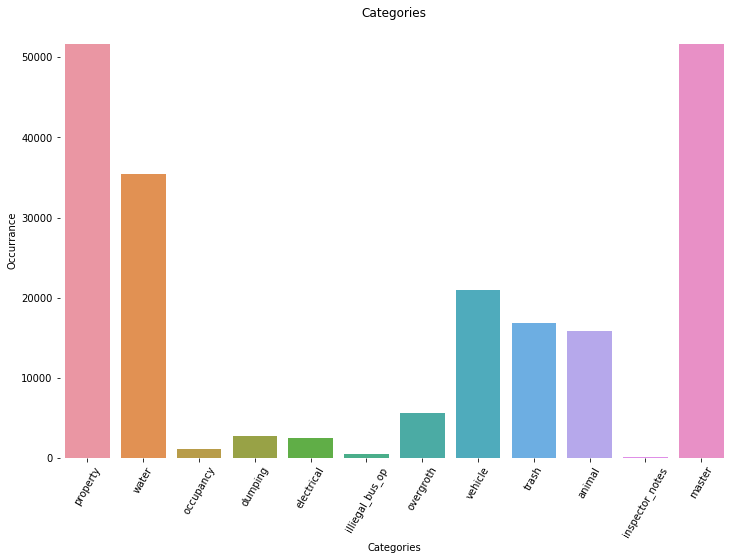

In [10]:
# simple way
# use pd.read_sql to create a dataframe instead of list
# plug dataframe into barplot

connection = psycopg2.connect(database="nashville", user = "postgres", password = "Dg033018", host = "127.0.0.1", port = "5432") 
categories_feq = pd.read_sql('select * from category_fequency_view;', con=connection)
#connection.close()
#type(df)
f, ax = plt.subplots(figsize=(8, 8))
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="Occurrance",
       xlabel="Categories")
sns.despine(left=True, bottom=True)

g = sns.barplot(data=categories_feq)
g.set_title('Categories')

g.figure.set_size_inches(12,8)
for item in g.get_xticklabels():
    item.set_rotation(60)

In [11]:
# All words inside the text field for all violations
words_inside_violation_text = pd.read_sql('SELECT violation_id, text_word\
                                FROM public.words_in_violation_text_view;', con=connection)


words_inside_violation_text.head(5)

,violation_id,text_word
0,2,"""Section"
1,2,16.16.030
2,2,(B)
3,2,-
4,2,Proper


In [12]:
# All words inside the description field for all violations
words_inside_violation_description = pd.read_sql('SELECT violation_id, desc_word \
                                             FROM public.words_in_violation_desc_view;', con=connection)


words_inside_violation_description.head(5)

,violation_id,desc_word
0,2,Proper
1,2,Maintenance
2,2,Req
3,2,-
4,2,Owner


In [13]:
# this are all distinct words inside the text field
text_catalog = pd.read_sql('SELECT word_id, text_word \
                            FROM public.text_catalog_view;', con=connection)


text_catalog.head(5)

,word_id,text_word
0,1,"goods,"
1,2,"headers,"
2,3,"address,"
3,4,rail
4,5,condition


In [14]:
# this are all distinct words inside the description field
description_catalog = pd.read_sql('SELECT word_id, desc_word \
                                     FROM public.desc_catalog_view;', con=connection)


description_catalog.head(5)

,word_id,desc_word
0,1,SYSTEM
1,2,Tractor-Trailer
2,3,wholesaler
3,4,Signs
4,5,Chickens


In [15]:
# Text field words cross reference

common_text_matrix = pd.read_sql('SELECT a_violation_id, a_desc_text, \
                                          b_violation_id, b_text_word, \
                                          c_complete_text \
                                     FROM public.common_text_matrix_view;', con=connection)


common_text_matrix.head(5)

,a_violation_id,a_desc_text,b_violation_id,b_text_word,c_complete_text
0,2,working,126,working,"""Section 16.16.030 (B) - Proper maintenance re..."
1,2,working,541,working,"""Section 16.16.030 (B) - Proper maintenance re..."
2,2,working,530,working,"""Section 16.16.030 (B) - Proper maintenance re..."
3,2,working,541,working,"""Section 16.16.030 (B) - Proper maintenance re..."
4,2,working,970,working,"""Section 16.16.030 (B) - Proper maintenance re..."


In [16]:
# Descriptions field word cross reference
common_desc_matrix = pd.read_sql('SELECT a_violation_id, a_desc_word, \
                                         b_violation_id, b_desc_word, c_complete_desc \
                                    FROM public.common_desc_matrix_view;', con=connection)


common_desc_matrix.head(5)

,a_violation_id,a_desc_word,b_violation_id,b_desc_word,c_complete_desc
0,2,Maintenance,164,Maintenance,Proper Maintenance Req - Owner
1,2,Maintenance,426,MAINTENANCE,Proper Maintenance Req - Owner
2,2,Maintenance,390,MAINTENANCE,Proper Maintenance Req - Owner
3,2,Maintenance,427,MAINTENANCE,Proper Maintenance Req - Owner
4,2,Maintenance,4,Maintenance,Proper Maintenance Req - Owner


In [17]:
# created 20 Categories out the most frequent  
violation_categories = pd.read_sql('SELECT category_id, category \
                                    FROM public.violation_categories;', con=connection)


violation_categories

,category_id,category
0,1,EXTERIOR
1,2,PERMIT
2,3,REQUIRED
3,4,BUILDINGS
4,5,SIGNS
5,6,PROHIBITED
6,7,WATER
7,8,BEER
8,9,OCCUPANCY
9,10,GARBAGE


In [18]:
# Here is were we use a predictive classification and assigne a category to each violation
# I will try linear regression nodel since I have the weight of each word in the matrix views 
# looking into Naive Bayes and Random Forest


In [19]:
import geopandas as gpd

In [84]:
# Extract lat and lng from database
connection = psycopg2.connect(database="nashville", user = "postgres", password = "Dg033018", host = "127.0.0.1", port = "5432") 

#CREATE OR REPLACE VIEW public.property_standards_violations_lat_lng_view AS
# SELECT property_standards_violations.request_no,
#    property_standards_violations.date_recv,
#    property_standards_violations.mapped_loc,
#    substr(property_standards_violations.mapped_loc, length(property_standards_violations.mapped_loc) - 22, 23) AS loc,
#    substr(property_standards_violations.mapped_loc, length(property_standards_violations.mapped_loc) - 21, 9) AS lat,
#    substr(property_standards_violations.mapped_loc, length(property_standards_violations.mapped_loc) - 10, 10) AS lng
#   FROM property_standards_violations;

connection = psycopg2.connect(database="nashville", user = "postgres", password = "Dg033018", host = "127.0.0.1", port = "5432") 
geo_std_violations = pd.read_sql('SELECT  mapped_loc, \
                                        loc, lat, lng \
                                    FROM public.property_standards_violations_lat_lng_view LIMIT 10;', con=connection)

geo_std_violations[['loc','lat','lng','mapped_loc']].head(4)


,loc,lat,lng,mapped_loc
0,"(36.213718, -86.861065)",36.213718,-86.861065,"121 QUEENS LN\nNASHVILLE, TN 37218\n(36.213718..."
1,"(36.170252, -86.795985)",36.170252,-86.795985,"1007 11TH AVE N\nNASHVILLE, TN 37208\n(36.1702..."
2,"(36.146283, -86.688968)",36.146283,-86.688968,"715 ERMAC DR\nNASHVILLE, TN 37214\n(36.146283,..."
3,"(36.196921, -86.754177)",36.196921,-86.754177,"903 BLUE RIDGE DR\nNASHVILLE, TN 37207\n(36.19..."


In [82]:
# Extract the lat and lng using Mary's function 
import re
# From Mary's code to extract the lat and lng

lat_lng_pattern = re.compile(r'\((.*),\s*(.*)\)', flags=re.MULTILINE)

def extract_lat_lng(address):
    try:
        lat_lng_match = lat_lng_pattern.search(address)
        lat = float(lat_lng_match.group(1))
        lng = float(lat_lng_match.group(2))
        return (lat, lng)
    except:
        return (np.NaN, np.NaN)  
 
address = '121 QUEENS LN\nNASHVILLE, TN 37218\n(36.213718, -86.861065)'        
a = extract_lat_lng(address)
print(a)

address = geo_std_violations['mapped_loc']

lat_and_lng = [extract_lat_lng(var) for var in address]

geo_std_violations['lat_and_lng'] = lat_lngs
geo_std_violations['lat'] = [lat for lat, lng in lat_and_lng]
geo_std_violations['lng'] = [lng for lat, lng in lat_and_lng]

geo_std_violations[['lat','lng','lat_and_lng']].head(4)




(36.213718, -86.861065)


,lat,lng,lat_and_lng
0,36.213718,-86.861065,"(36.213718, -86.861065)"
1,36.170252,-86.795985,"(36.170252, -86.795985)"
2,36.146283,-86.688968,"(36.146283, -86.688968)"
3,36.196921,-86.754177,"(36.196921, -86.754177)"
